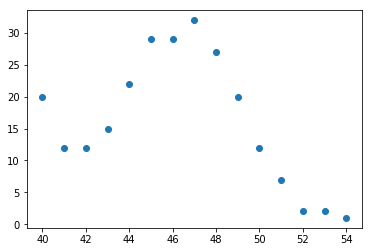

In [216]:
import numpy as np
import pandas as pd
import scipy.optimize as optimization
import matplotlib.pyplot as plt

filename = '../data/100_1113.txt'

channel = np.linspace(0,255, num=256)
values = np.loadtxt(filename)



vfunc = np.vectorize(lambda t: 1 if t == 0 else t)

values = vfunc(values)

plotFrom = 40
plotTo = 55
plt.scatter(channel[plotFrom:plotTo], values[plotFrom:plotTo])

[ 4.66243363e+01  1.45838199e+00  1.00789620e+02  2.85588331e+03
 -1.33502542e-01] [1.89666112e-01 1.25467565e-01 9.41305291e+00 1.76986579e+03
 1.25777353e-02]


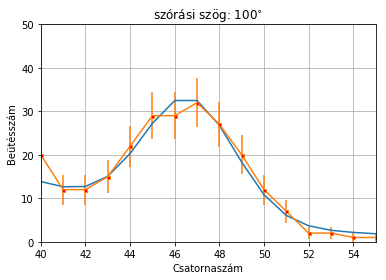

In [218]:
error = np.sqrt(values)

startVal = 40
endVal = 80

def gauss(x, m, s, A, bA, bb):
    return A/(np.sqrt(2*np.pi)*s)*np.exp(-((x-m)/(2*s))**2) + bA*np.exp(bb*x)

x0 = np.array([45.,3., 180., 330., -.13])

params, cov = optimization.curve_fit(gauss, channel[startVal:endVal], values[startVal:endVal],
                                     x0, error[startVal:endVal])
perr = np.sqrt(np.diag(cov))

plt.plot(channel, gauss(channel, *params))
plt.errorbar(channel, values, error, marker='s', mfc='red', ms=3)
plt.xlim(plotFrom,plotTo)
plt.ylim(0,50)
plt.title('szórási szög: 100$^{\circ}$')
plt.xlabel('Csatornaszám')
plt.ylabel('Beütésszám')
plt.grid(True)
plt.savefig('../plots/withbackground/100_1113fit.png')

print(params, perr)

In [219]:
np.savetxt('../gaussfits/withbackground/100_1113fit.dat', (params, perr))